## Importing libaries

In [15]:
import pandas as pd

from sklearn import preprocessing 
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn import model_selection, svm
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import metrics, neighbors
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

import os
os.chdir('../Preprocessing')
from normalization import normalize_corpus


## Reading the data

In [16]:
df = pd.read_csv('../Data_collection/dataset.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36891 entries, 0 to 36890
Data columns (total 3 columns):
CATEGORY    36891 non-null object
CONTENT     36891 non-null object
SUMMARY     36891 non-null object
dtypes: object(3)
memory usage: 864.7+ KB


## Normalizing the data

#### The implementation of this is available under normalization.py located in preprocessing folder

In [17]:
df['FILTERED_CONTENT'] = df['CONTENT'].apply(normalize_corpus)

df.head()

,CATEGORY,CONTENT,SUMMARY,FILTERED_CONTENT
0,business,The Federal Reserve approved Ally Financial In...,The Federal Reserve approved Ally Financial In...,the federal reserve approve ally financial cap...
1,business,— Major shareholders of Duke Energy Corp. have...,— Major shareholders of Duke Energy Corp. have...,major shareholder duke energy call companys bo...
2,business,Photos taken earlier this month show that Nort...,Photos taken earlier this month show that Nort...,photo take earlier month show north carolina r...
3,business,Thanks to dogged reporting by the Associated P...,Thanks to dogged reporting by the Associated P...,thanks dog report associated press know active...
4,business,The energy giant says it is committed to clean...,The energy giant says it is committed to clean...,the energy giant say commit clean dan river sp...


Text(0.5, 1.0, 'Before sampling')

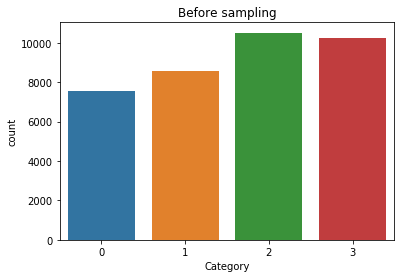

In [18]:
# Encode labels in column 'category'.
label_encoder = preprocessing.LabelEncoder() 
df['CATEGORY']= label_encoder.fit_transform(df['CATEGORY']) 

sns.countplot(df.CATEGORY)
plt.xlabel('Category')
plt.ylabel('count')
plt.title('Before sampling')

Text(0.5, 1.0, 'After sampling')

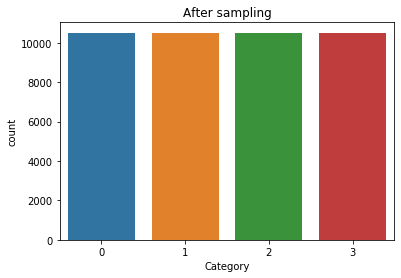

In [19]:
#Sampling the data

df0 = df[df.CATEGORY==0]
df1 = df[df.CATEGORY==1]
df2 = df[df.CATEGORY==2]
df3 = df[df.CATEGORY==3]

samples = df.CATEGORY.value_counts().tolist()



df0 = resample(df0, 
                   replace=True,   
                   n_samples=samples[0], 
                   random_state=1130)
df1 = resample(df1, 
                   replace=True,    
                   n_samples=samples[0],
                   random_state=123)
df2 = resample(df2, 
                   replace=True,    
                   n_samples=samples[0],
                   random_state=123)
df3 = resample(df3, 
                   replace=True,    
                   n_samples=samples[0],
                   random_state=123)


df_sampled = pd.concat([df0,df1,df2,df3])

df= df_sampled



sns.countplot(df_sampled.CATEGORY)
plt.xlabel('Category')
plt.ylabel('count')
plt.title('After sampling')

## Feature Extraction using Bag of words

In [20]:
training_set, test_set, training_labels, test_labels = train_test_split(df["FILTERED_CONTENT"], df["CATEGORY"], test_size=0.33, random_state=42)

In [21]:
#Bag of words
vectorizer = CountVectorizer(min_df =2, ngram_range=(2,2))
bow_train_features = vectorizer.fit_transform(training_set)
bow_test_features = vectorizer.transform(test_set)

#### Classification using Bag of words features

C:\Users\Hetal\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Hetal\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Logistic Regression using Bag of words

Accuracy:  95.25492175668853 

Classification Report

              precision    recall  f1-score   support

           0       0.93      0.96      0.94      3564
           1       0.97      0.97      0.97      3367
           2       0.95      0.95      0.95      3468
           3       0.96      0.94      0.95      3468

    accuracy                           0.95     13867
   macro avg       0.95      0.95      0.95     13867
weighted avg       0.95      0.95      0.95     13867



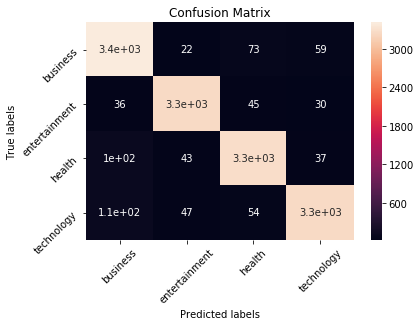

In [22]:
#Logistic Regression

logRegModel = LogisticRegression()
logRegModel.fit(bow_train_features,training_labels)

predictions_lr = logRegModel.predict(bow_test_features)

print("Logistic Regression using Bag of words\n")
print("Accuracy: ",accuracy_score(predictions_lr, test_labels)*100,"\n")

print("Classification Report\n")
print(classification_report(test_labels,predictions_lr))


#Plotting the confusion matrix
cm = confusion_matrix(test_labels, predictions_lr)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['business', 'entertainment','health','technology'],rotation =45); 
ax.yaxis.set_ticklabels(['business', 'entertainment','health','technology'],rotation =45);


MultiNomial Naive Bayes using Bag of words

Accuracy:  94.5914761664383 

Classification Report

              precision    recall  f1-score   support

           0       0.93      0.94      0.93      3564
           1       0.95      0.97      0.96      3367
           2       0.96      0.93      0.95      3468
           3       0.94      0.94      0.94      3468

    accuracy                           0.95     13867
   macro avg       0.95      0.95      0.95     13867
weighted avg       0.95      0.95      0.95     13867



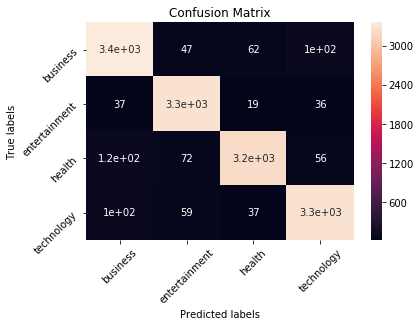

In [23]:
#Naive Bayes
mnb = MultinomialNB()
mnb.fit(bow_train_features,training_labels)

predictions_mnb = mnb.predict(bow_test_features)

print("MultiNomial Naive Bayes using Bag of words\n")
print("Accuracy: ",accuracy_score(predictions_mnb, test_labels)*100,"\n")

print("Classification Report\n")
print(classification_report(test_labels,predictions_mnb))


#Plotting the confusion matrix
cm = confusion_matrix(test_labels, predictions_mnb)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['business', 'entertainment','health','technology'],rotation =45); 
ax.yaxis.set_ticklabels(['business', 'entertainment','health','technology'],rotation =45);


Random Forest using Bag of words

Accuracy:  92.60113939568761 

Classification Report

              precision    recall  f1-score   support

           0       0.91      0.93      0.92      3564
           1       0.91      0.97      0.94      3367
           2       0.94      0.91      0.92      3468
           3       0.94      0.90      0.92      3468

    accuracy                           0.93     13867
   macro avg       0.93      0.93      0.93     13867
weighted avg       0.93      0.93      0.93     13867



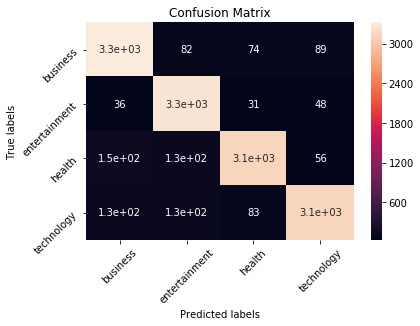

In [24]:
#Random Forest
rfc = RandomForestClassifier(n_estimators=10)
rfc.fit(bow_train_features,training_labels)

predictions_rfc = rfc.predict(bow_test_features)

print("Random Forest using Bag of words\n")
print("Accuracy: ",accuracy_score(predictions_rfc, test_labels)*100,"\n")

print("Classification Report\n")
print(classification_report(test_labels,predictions_rfc))


#Plotting the confusion matrix
cm = confusion_matrix(test_labels, predictions_rfc)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['business', 'entertainment','health','technology'],rotation =45); 
ax.yaxis.set_ticklabels(['business', 'entertainment','health','technology'],rotation =45);

Support Vector Machine using Bag of words

Accuracy:  94.81327800829875 

Classification Report

              precision    recall  f1-score   support

           0       0.94      0.94      0.94      3583
           1       0.96      0.97      0.97      3422
           2       0.93      0.95      0.94      3442
           3       0.96      0.93      0.95      3531

    accuracy                           0.95     13978
   macro avg       0.95      0.95      0.95     13978
weighted avg       0.95      0.95      0.95     13978



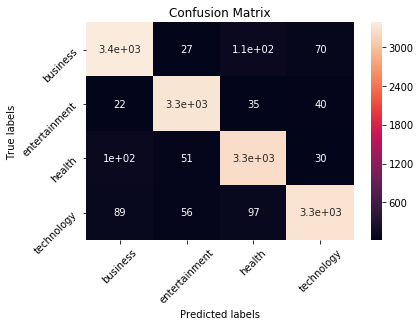

In [22]:
#Support Vector Machines

SVM = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
SVM.fit(bow_train_features,training_labels)

predictions_SVM = SVM.predict(bow_test_features)

print("Support Vector Machine using Bag of words\n")
print("Accuracy: ",accuracy_score(predictions_SVM, test_labels)*100,"\n")

print("Classification Report\n")
print(classification_report(test_labels,predictions_SVM))


#Plotting the confusion matrix
cm = confusion_matrix(test_labels, predictions_SVM)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['business', 'entertainment','health','technology'],rotation =45); 
ax.yaxis.set_ticklabels(['business', 'entertainment','health','technology'],rotation =45);


## Feature Extractiong using TF-IDF vector

In [25]:
#Tfidf 
tfidvectorizer = TfidfVectorizer(min_df=2, 
                                 ngram_range=(2,2),
                                 smooth_idf=True,
                                 use_idf=True)
tfid_train_features = tfidvectorizer.fit_transform(training_set)

tfid_test_features = tfidvectorizer.transform(test_set)

#### Classification using TF-IDF features

C:\Users\Hetal\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Hetal\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Logistic Regression using TF-IDF

Accuracy:  94.72742881671198 

Classification Report

              precision    recall  f1-score   support

           0       0.93      0.94      0.94      3583
           1       0.95      0.98      0.97      3422
           2       0.95      0.94      0.94      3442
           3       0.95      0.93      0.94      3531

    accuracy                           0.95     13978
   macro avg       0.95      0.95      0.95     13978
weighted avg       0.95      0.95      0.95     13978



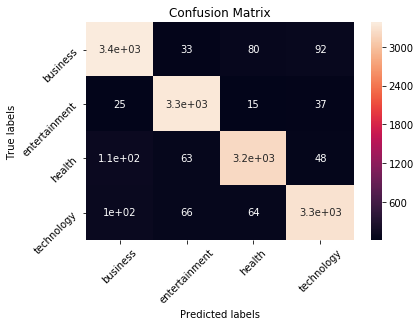

In [24]:
logRegModel = LogisticRegression()
logRegModel.fit(tfid_train_features,training_labels)

predictions_lr = logRegModel.predict(tfid_test_features)
score_lr = logRegModel.score(tfid_test_features,test_labels)

print("Logistic Regression using TF-IDF\n")
print("Accuracy: ",accuracy_score(predictions_lr, test_labels)*100,"\n")

print("Classification Report\n")
print(classification_report(test_labels,predictions_lr))


#Plotting the confusion matrix
cm = confusion_matrix(test_labels, predictions_lr)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['business', 'entertainment','health','technology'],rotation =45); 
ax.yaxis.set_ticklabels(['business', 'entertainment','health','technology'],rotation =45);


MultiNomial Naive Bayes using TF-IDF

Accuracy:  94.54142223494063 

Classification Report

              precision    recall  f1-score   support

           0       0.93      0.94      0.93      3583
           1       0.96      0.98      0.97      3422
           2       0.95      0.94      0.94      3442
           3       0.94      0.93      0.94      3531

    accuracy                           0.95     13978
   macro avg       0.95      0.95      0.95     13978
weighted avg       0.95      0.95      0.95     13978



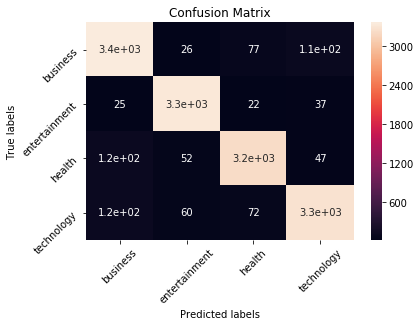

In [25]:
#Naive Bayes
mnb = MultinomialNB()

mnb.fit(tfid_train_features,training_labels)

predictions_mnb = mnb.predict(tfid_test_features)

print("MultiNomial Naive Bayes using TF-IDF\n")
print("Accuracy: ",accuracy_score(predictions_mnb, test_labels)*100,"\n")

print("Classification Report\n")
print(classification_report(test_labels,predictions_mnb))


#Plotting the confusion matrix
cm = confusion_matrix(test_labels, predictions_mnb)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['business', 'entertainment','health','technology'],rotation =45); 
ax.yaxis.set_ticklabels(['business', 'entertainment','health','technology'],rotation =45);


Random Forest using TF-IDF

Accuracy:  92.05894977822292 

Classification Report

              precision    recall  f1-score   support

           0       0.92      0.92      0.92      3583
           1       0.95      0.95      0.95      3422
           2       0.87      0.93      0.90      3442
           3       0.94      0.88      0.91      3531

    accuracy                           0.92     13978
   macro avg       0.92      0.92      0.92     13978
weighted avg       0.92      0.92      0.92     13978



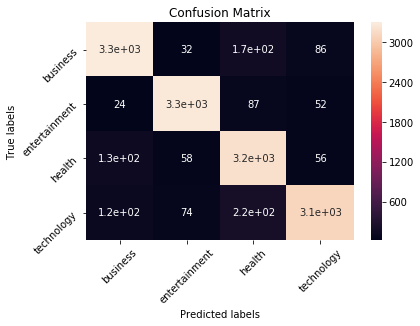

In [26]:
#Random Forest
rfc = RandomForestClassifier(n_estimators=10)

rfc.fit(tfid_train_features,training_labels)

predictions_rfc = rfc.predict(tfid_test_features)

print("Random Forest using TF-IDF\n")
print("Accuracy: ",accuracy_score(predictions_rfc, test_labels)*100,"\n")

print("Classification Report\n")
print(classification_report(test_labels,predictions_rfc))


#Plotting the confusion matrix
cm = confusion_matrix(test_labels, predictions_rfc)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['business', 'entertainment','health','technology'],rotation =45); 
ax.yaxis.set_ticklabels(['business', 'entertainment','health','technology'],rotation =45);

Support Vector Machine using IF-IDF

Accuracy:  95.26398626412934 

Classification Report

              precision    recall  f1-score   support

           0       0.94      0.95      0.94      3583
           1       0.96      0.98      0.97      3422
           2       0.95      0.95      0.95      3442
           3       0.96      0.94      0.95      3531

    accuracy                           0.95     13978
   macro avg       0.95      0.95      0.95     13978
weighted avg       0.95      0.95      0.95     13978



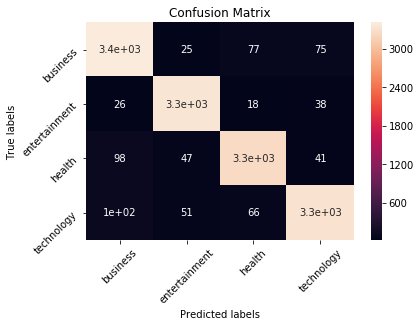

In [27]:
SVM = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
SVM.fit(tfid_train_features,training_labels)

predictions_SVM = SVM.predict(tfid_test_features)


print("Support Vector Machine using IF-IDF\n")
print("Accuracy: ",accuracy_score(predictions_SVM, test_labels)*100,"\n")

print("Classification Report\n")
print(classification_report(test_labels,predictions_SVM))


#Plotting the confusion matrix
cm = confusion_matrix(test_labels, predictions_SVM)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax);

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['business', 'entertainment','health','technology'],rotation =45); 
ax.yaxis.set_ticklabels(['business', 'entertainment','health','technology'],rotation =45);


In [8]:
def knn(p,n,vector_type, metric=None):
        
    X_train, X_test, y_train, y_test = train_test_split(df["FILTERED_CONTENT"], df["CATEGORY"],
                                                        test_size=0.2, random_state=5)
    
    knn = neighbors.KNeighborsClassifier(n_neighbors=n, weights='distance', algorithm='auto', metric=metric, p=p, n_jobs=1)
    
    if vector_type == 'BoW':
        vectorizer = CountVectorizer(analyzer='word', input='content')
        train_vec = vectorizer.fit_transform(X_train)
        test_vec = vectorizer.transform(X_test)
    
    elif vector_type == 'tfidf':
        vectorizer =  TfidfVectorizer(analyzer='word', input='content')
        train_vec = vectorizer.fit_transform(X_train)
        test_vec = vectorizer.transform(X_test)

    

    knn.fit(train_vec, y_train)
    predicted = knn.predict(test_vec)
    acc = metrics.accuracy_score(y_test, predicted)
    print('Accuracy: KNN with {}, neighbors: {}, distance metric: {}  = {}'.format(vector_type, n,metric, str(acc * 100) + '%'))

In [11]:
for n_neighbor in range(2,8,1):
    knn(2,n_neighbor,'BoW','cosine')

Accuracy: KNN with BoW, neighbors: 2, distance metric: cosine  = 95.60923369823894%
Accuracy: KNN with BoW, neighbors: 3, distance metric: cosine  = 95.5140409328891%
Accuracy: KNN with BoW, neighbors: 4, distance metric: cosine  = 95.38315088053308%
Accuracy: KNN with BoW, neighbors: 5, distance metric: cosine  = 95.50214183722036%
Accuracy: KNN with BoW, neighbors: 6, distance metric: cosine  = 95.49024274155164%
Accuracy: KNN with BoW, neighbors: 7, distance metric: cosine  = 95.44264635887673%


In [13]:
for n_neighbor in range(2,8,1):
    knn(2,n_neighbor,'BoW','euclidean')

Accuracy: KNN with BoW, neighbors: 2, distance metric: euclidean  = 93.53879105188005%
Accuracy: KNN with BoW, neighbors: 3, distance metric: euclidean  = 93.14612089481199%
Accuracy: KNN with BoW, neighbors: 4, distance metric: euclidean  = 93.27701094716801%
Accuracy: KNN with BoW, neighbors: 5, distance metric: euclidean  = 93.16991908614945%
Accuracy: KNN with BoW, neighbors: 6, distance metric: euclidean  = 93.2294145644931%
Accuracy: KNN with BoW, neighbors: 7, distance metric: euclidean  = 92.78914802475012%


In [12]:
for n_neighbor in range(2,8,1):
    knn(2,n_neighbor,'tfidf','euclidean')

Accuracy: KNN with tfidf, neighbors: 2, distance metric: euclidean  = 95.76392194193242%
Accuracy: KNN with tfidf, neighbors: 3, distance metric: euclidean  = 95.7163255592575%
Accuracy: KNN with tfidf, neighbors: 4, distance metric: euclidean  = 95.65683008091385%
Accuracy: KNN with tfidf, neighbors: 5, distance metric: euclidean  = 95.76392194193242%
Accuracy: KNN with tfidf, neighbors: 6, distance metric: euclidean  = 95.76392194193242%
Accuracy: KNN with tfidf, neighbors: 7, distance metric: euclidean  = 96.01380295097573%


In [14]:
for n_neighbor in range(2,8,1):
    knn(2,n_neighbor,'tfidf','cosine')

Accuracy: KNN with tfidf, neighbors: 2, distance metric: cosine  = 95.76392194193242%
Accuracy: KNN with tfidf, neighbors: 3, distance metric: cosine  = 95.70442646358876%
Accuracy: KNN with tfidf, neighbors: 4, distance metric: cosine  = 95.78772013326987%
Accuracy: KNN with tfidf, neighbors: 5, distance metric: cosine  = 95.85911470728225%
Accuracy: KNN with tfidf, neighbors: 6, distance metric: cosine  = 95.94240837696336%
Accuracy: KNN with tfidf, neighbors: 7, distance metric: cosine  = 96.03760114231319%
